# Objetivos:
 - implementação dos seguintes metodos de algoritmos de metodos de alcançar os zeros reais de uma função:
   - Método da Bisseção
   - Método da Falsa Posição
   - Método do Ponto Fixo
   - Método de Newton-Raphson
   - Método da Secante

In [1]:
import math
import time

#! Funções requeridas
def funcao_1(x): return math.e**(-x**2) - math.cos(x)

def funcao_2(x): return x**3 - x - 1

def funcao_3(x): return 4*math.sin(x) - math.e**(x)

def funcao_4(x): return x*math.log(x) - 1

def funcao_5(x): return x**3 - 3.5*(x**2) + 4*x - 1.5


In [2]:
# Funções phi das originais
def phi_1(x): # F1: e^(-x^2) - cos(x) = 0  =>  x = arccos(e^(-x^2)) 
    try:
        val = math.exp(-(x**2))
        if val > 1: val = 1
        return math.acos(val)
    except:
        return x

def phi_2(x): # F2: x^3 - x - 1 = 0  =>  x = (x + 1)^(1/3) 
    return (x + 1)**(1/3)

def phi_3(x):# F3: 4sin(x) - e^x = 0  =>  4sin(x) = e^x  =>  x = ln(4sin(x))
    val = 4 * math.sin(x)
    if val <= 0: return x 
    return math.log(val)

def phi_4(x):# F4: x*log(x) - 1 = 0  =>  log(x) = 1/x  =>  x = e^(1/x)
    if x == 0: return x
    return math.exp(1/x)

def phi_5(x):# Isolando x: 4x = -x^3 + 3.5x^2 + 1.5
    return (-x**3 + 3.5*(x**2) + 1.5) / 4

In [3]:
# derivadas das funções originais
def dfuncao_1(x): 
    return -2*x*math.exp(-(x**2)) + math.sin(x) # Derivada de e^(-x^2) - cos(x)

def dfuncao_2(x): 
    return 3*(x**2) - 1 # Derivada de x^3 - x - 1

def dfuncao_3(x): 
    return 4*math.cos(x) - math.exp(x) # Derivada de 4sin(x) - e^x

def dfuncao_4(x): 
    return math.log(x) + 1 # Derivada de x*ln(x) - 1

def dfuncao_5(x): # Derivada de x^3 - 3.5x^2 + 4x - 1.5
    return 3*(x**2) - 7*x + 4

In [4]:
# configurações gçobais
epsilons = [ 10**(-4), 10**(-6), 10**(-5), 10**(-7),10**(-4)]

intervalos = [
    (1,2),
    (1,2),
    (0,1),
    (1,2), 
    (0,1.5)
]

chutes_x0 =[(a + b / 2) for a,b in intervalos]

lista_funcoes = [funcao_1, funcao_2, funcao_3, funcao_4, funcao_5]
lista_derivadas = [dfuncao_1, dfuncao_2, dfuncao_3, dfuncao_4, dfuncao_5]
lista_phis = [phi_1, phi_2, phi_3, phi_4, phi_5]

## Metodo da Bisseção
O objetivo desse metodo é reduzir a amplitude do intervalo que contenha a raiz até se atingir a presisão requerida: (b-a) < ε. Iterando sussecivas vezes subistituindo o valor de a ou b pelo valor do ponto médio c = (a+b)/2, dependendo do sinal da função f(c).

In [5]:

def bissecao(f, a, b, precision, inter_max) -> tuple[float | None, int, int, float, float]:
    """
    f: Descrição
    a: Descrição
    b: Descrição
    precision: Descrição
    inter_max: Descrição
    """
    # Variaveis de controle
    inicio = time.time()
    count = 0
    f_count = 0
    iteract_timeList = []
    raiz = None

    # Verifica se o intervalo é valido
    fa = f(a)
    fb = f(b)
    f_count += 2
    
    if fa * fb > 0: return raiz, count, f_count, (time.time() - inicio), 0                                        # Intervalo invalido
    count = 1
    
    while count <= inter_max:
        iteract_time = time.time()
        x = (a + b) / 2                                                                                            # Ponto medio do intervalo [a, b]
        fx = f(x)                                                                                                  # Avaliacao da funcao no ponto medio
        f_count += 1

        if abs(fx) < precision or (b - a) / 2 < precision:                                                         #Verifica se a precisao foi atingida
            raiz =  x
            break

        if fa * fx > 0:                                                                                            # Se o zero esta no intervalo [x, b] >> atualiza a = x
            a = x
            fa = fx
        else:                                                                                                      # Se o zero esta no intervalo [a, x] >> atualiza b = x
            b = x
        
        count += 1
        iteract_timeList.append(time.time() - iteract_time)
    
    if raiz is None:
        raiz = (a + b) / 2

    iteract_time_avg = sum(iteract_timeList) / len(iteract_timeList) if iteract_timeList else 0

    return raiz, count, f_count, (time.time() - inicio), iteract_time_avg

In [6]:
resultados_bissecao = []

print("Rodando Bissecção...")
for i in range(4):
    a, b = intervalos[i]
    res = bissecao(lista_funcoes[i], a, b, epsilons[i], 100)
    resultados_bissecao.append(res)
    print(f"Função {i+1}: {res}")

Rodando Bissecção...
Função 1: (1.447265625, 9, 11, 4.2438507080078125e-05, 1.4901161193847656e-06)
Função 2: (1.3247175216674805, 20, 22, 1.239776611328125e-05, 4.76837158203125e-07)
Função 3: (0.3705596923828125, 16, 18, 1.0013580322265625e-05, 3.814697265625e-07)
Função 4: (1.7632228136062622, 23, 25, 1.2159347534179688e-05, 3.7930228493430396e-07)


## Metodo da posição falsa
No caso da bisceção, x é o ponto medio aritmetico entre a e b. No metodo da posiçao falsa, x é o ponto onde a reta que liga os pontos (a, f(a)) e (b, f(b)) intercepta o eixo x.
ou seja:
$$
x = (\frac{aF(b) - bF(a)}{F(b) - F(a)}) 
$$


In [7]:
def posicao_falsa(f, a, b, precision, inter_max):
    """
    f: Descrição
    a: Descrição
    b: Descrição
    precision: Descrição
    inter_max: Descrição
    """
    inicio = time.time()
    count = 0
    f_count = 0
    iteract_timeList = []
    raiz = None

    fa = f(a)
    fb = f(b)
    f_count += 2
    
    if fa * fb > 0: return raiz, count, f_count, (time.time() - inicio), 0                          # Intervalo invalido
    count = 1

    x = (a*fb - b*fa) / (fb - fa)                                                                   # Ponto de interseccao da reta com o eixo x

    while count <= inter_max:
        iteract_time = time.time()
        x = (a*fb - b*fa) / (fb - fa)                                                               # Ponto de interseccao da reta com o eixo x
        fx = f(x)
        f_count += 1

        if abs(fx) < precision or abs(b - a) < precision: 
            raiz = x
            break

        if fa * fx > 0:                                                                             # Se o zero esta no intervalo [x, b] >> atualiza a = x
            a = x
            fa = fx
        else:                                                                                       # Se o zero esta no intervalo [a, x] >> atualiza b = x
            b = x
            fb = fx
        
        count += 1
        iteract_timeList.append(time.time() - iteract_time)
    
    if raiz is None:
        raiz = x
        
    iteract_time_avg = sum(iteract_timeList) / len(iteract_timeList) if iteract_timeList else 0
    return raiz, count, f_count, (time.time() - inicio), iteract_time_avg



In [8]:
resultados_falsa = []

print("Rodando Posição Falsa...")
for i in range(4):
    a, b = intervalos[i]
    res = posicao_falsa(lista_funcoes[i], a, b, epsilons[i], 100)
    resultados_falsa.append(res)
    print(f"Função {i+1}: {res}")

Rodando Posição Falsa...
Função 1: (1.4473570678005705, 6, 8, 2.5272369384765625e-05, 2.1457672119140625e-06)
Função 2: (1.3247177628396751, 17, 19, 2.002716064453125e-05, 9.238719940185547e-07)
Função 3: (0.37055882835462395, 8, 10, 1.1920928955078125e-05, 9.5367431640625e-07)
Função 4: (1.7632228302998445, 6, 8, 8.58306884765625e-06, 7.152557373046875e-07)


## Metodo do Ponto Fixo
O MPF consiste em transformar a equação f(x) = 0 em x = phi(x) e apartir de uma aproximação inicial $x_0$ phiera a sequencia {$x_k$} de aproximações para ɛ pela relação x_k+1 = phi(x_k), pois a função phi é tal que f(ɛ) = 0 se e somente se phi(ɛ) = ɛ. Transformando, assim o problema de encontrar um zero de f(x) mo problema de encontrar um ponto fixo de phi(x).
Diferente dos métodos de quebra de intervalo, o MPF parte de um chute inicial $x_0$ e gera uma sequência de aproximações $x_1, x_2, \dots, x_k$ através da relação de recorrência:
$$x_{k+1} = \phi(x_k)$$

In [9]:
def ponto_fixo(phi, x0, precision, inter_max) -> tuple:
    """
    phi: Função de iteração x = phi(x)
    x0: Chute inicial
    """
    inicio = time.perf_counter()
    count = 0
    f_count = 0 # Contamos avaliações de phi(x)
    
    x_old = x0
    raiz = None
    
    while count < inter_max:
        try:
            # Passo principal
            x_new = phi(x_old)
            f_count += 1
            
            # Critério de Parada
            if abs(x_new - x_old) < precision:
                raiz = x_new
                break
            
            x_old = x_new
            count += 1
            
        except (ValueError, OverflowError):
            # O MPF tava falhando em alguns casos, isso evita o crash
            break

    # Cálculos finais
    tempo_total = time.perf_counter() - inicio
    tempo_medio = tempo_total / count if count > 0 else 0
    
    return raiz, count, f_count, tempo_total, tempo_medio

# tive que escrever muito comentários para explicar o código, vou dar o espaço anterior não #cansado kkkk

In [10]:
resultados_ponto_fixo = []

print("Rodando Ponto Fixo...")
for i in range(4):
    res = ponto_fixo(lista_phis[i], chutes_x0[i], epsilons[i], 100)
    resultados_ponto_fixo.append(res)
    print(f"Função {i+1}: {res}")

Rodando Ponto Fixo...
Função 1: (1.44743853735165, 8, 9, 1.1599971912801266e-05, 1.4499964891001582e-06)
Função 2: (1.3247181523859666, 8, 9, 2.700020559132099e-06, 3.375025698915124e-07)
Função 3: (1.364956691130343, 10, 11, 5.600042641162872e-06, 5.600042641162872e-07)
Função 4: (1.7632228614021939, 27, 28, 4.8999791033566e-06, 1.8148070753172592e-07)


## Metodo de Newton-Raphson
O Método de Newton-Raphson é um dos métodos mais poderosos para determinação de raízes. Geometricamente, ele substitui a curva da função $f(x)$ por sua reta tangente no ponto atual $x_k$. A intersecção dessa tangente com o eixo das abscissas fornece a próxima aproximação $x_{k+1}$.
Matematicamente, ele é derivado da expansão em Série de Taylor truncada no termo linear. Partindo de uma estimativa inicial $x_0$, gera-se a sequência de aproximações através da fórmula iterativa:
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

In [11]:
def newton_raphson(f, df, x0, precision, inter_max) -> tuple:
    """
    f: Função f(x)
    df: Derivada f'(x)
    x0: Chute inicial
    """
    inicio = time.perf_counter()
    count = 0
    f_count = 0 # Contamos chamadas de f e df
    
    x = x0
    raiz = None
    
    while count < inter_max:
        # Avaliações
        fx = f(x)
        dfx = df(x)
        f_count += 2
        
        # Critério de Parada
        if abs(fx) < precision:
            raiz = x
            break
            
        # Proteção contra divisão por zero (Derivada nula)
        if dfx == 0:
            print("Erro: Derivada zero encontrada. Método falhou.")
            break
            
        # Passo de Newton: x_novo = x - f(x)/f'(x)
        x_novo = x - (fx / dfx)
        
        # Critério de Parada
        if abs(x_novo - x) < precision:
            raiz = x_novo
            break
            
        x = x_novo
        count += 1

    # Cálculos finais
    tempo_total = time.perf_counter() - inicio
    tempo_medio = tempo_total / count if count > 0 else 0
    
    return raiz, count, f_count, tempo_total, tempo_medio

In [12]:
resultados_newton = []

print("Rodando Newton-Raphson...")
for i in range(4):
    res = newton_raphson(lista_funcoes[i], lista_derivadas[i], chutes_x0[i], epsilons[i], 100)
    resultados_newton.append(res)
    print(f"Função {i+1}: {res}")

Rodando Newton-Raphson...
Função 1: (1.4474146268848234, 3, 8, 1.2699980288743973e-05, 4.233326762914658e-06)
Função 2: (1.3247179572458576, 5, 12, 3.7999707274138927e-06, 7.599941454827786e-07)
Função 3: (0.37055808376128896, 3, 8, 3.4999684430658817e-06, 1.1666561476886272e-06)
Função 4: (1.7632228343842757, 3, 8, 3.500026650726795e-06, 1.166675550242265e-06)


## Metodo Secante
O Método da Secante surge como uma alternativa ao Método de Newton-Raphson para situações onde calcular a derivada $f'(x)$ é difícil ou custoso computacionalmente.
Em vez de usar a derivada exata (reta tangente), o método aproxima a inclinação da tangente usando uma **reta secante** que passa pelos dois pontos anteriores da iteração ($x_{k}$ e $x_{k-1}$). Diferente de Newton (que precisa de 1 ponto) e Bissecção (que precisa de um intervalo), a Secante precisa de **dois pontos iniciais** ($x_0$ e $x_1$) para começar a traçar a reta. A fórmula de recorrência é:

$$x_{k+1} = x_k - \frac{f(x_k) \cdot (x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$

In [13]:
def funcao_1(x): return math.exp(-(x**2)) - math.cos(x)
def funcao_2(x): return x**3 - x - 1
def funcao_3(x): return 4*math.sin(x) - math.exp(x)
def funcao_4(x): return x*math.log(x) - 1

# --- Configurações ---
epsilons = [1e-4, 1e-6, 1e-5, 1e-7]

#intervalos
chutes = [
    (1, 2), # Func 1
    (1, 2), # Func 2
    (0, 1), # Func 3
    (1, 2)  # Func 4
]

def secante(f, x0, x1, precision, inter_max) -> tuple:
    """
    f: Função f(x)
    x0, x1: Pontos iniciais
    """
    inicio = time.perf_counter()
    count = 0
    f_count = 0
    
    # Avaliação inicial dos dois pontos
    fx0 = f(x0)
    fx1 = f(x1)
    f_count += 2
    
    raiz = None
    
    # Verificação se já começamos na raiz
    if abs(fx0) < precision: return x0, 0, f_count, (time.perf_counter() - inicio), 0
    if abs(fx1) < precision: return x1, 0, f_count, (time.perf_counter() - inicio), 0

    while count < inter_max:
        # Proteção contra divisão por zero
        if abs(fx1 - fx0) < 1e-15:
            print("Aviso: Divisão por zero iminente (f(x1) ~= f(x0)).")
            break

        x_new = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0) # Fórmula da Secante >> atualizando novo ponto
        
        fx_new = f(x_new)
        f_count += 1
        
        # Critérios de Parada
        if abs(fx_new) < precision or abs(x_new - x1) < precision:
            raiz = x_new
            break
            
        # Atualização dos pontos
        x0 = x1
        fx0 = fx1
        
        x1 = x_new
        fx1 = fx_new
        
        count += 1

    # Cálculos finais
    tempo_total = time.perf_counter() - inicio
    tempo_medio = tempo_total / count if count > 0 else 0
    
    # não convergiu >> retorna o último calculado
    if raiz is None: raiz = x_new
    
    return raiz, count, f_count, tempo_total, tempo_medio

In [14]:
resultados_secante = []

print("Rodando Secante...")
for i in range(4):
    a, b = intervalos[i]
    res = secante(lista_funcoes[i], a, b, epsilons[i], 100)
    resultados_secante.append(res)
    print(f"Função {i+1}: {res}")

Rodando Secante...
Função 1: (1.4474134472158682, 4, 7, 1.1400028597563505e-05, 2.8500071493908763e-06)
Função 2: (1.3247179653538177, 5, 8, 4.600035026669502e-06, 9.200070053339005e-07)
Função 3: (0.3705580982770991, 6, 9, 4.400033503770828e-06, 7.33338917295138e-07)
Função 4: (1.7632228304360502, 3, 6, 3.0999653972685337e-06, 1.0333217990895112e-06)


## Tabela comparativa dos métodos

In [15]:
import pandas as pd

tabela_geral = []

nomes_metodos = ["Bissecção", "Posição Falsa", "Ponto Fixo", "Newton-Raphson", "Secante"]
todas_as_listas = [resultados_bissecao, resultados_falsa, resultados_ponto_fixo, resultados_newton, resultados_secante]

for i_metodo, lista_atual in enumerate(todas_as_listas):
    for i_funcao, resultado in enumerate(lista_atual):
        
        raiz = resultado[0]
        iteracoes = resultado[1]
        avaliacoes = resultado[2]
        tempo_total = resultado[3]
        tempo_medio = resultado[4]
        
        tabela_geral.append({
            "Método": nomes_metodos[i_metodo],
            "Função": f"Função {i_funcao + 1}",
            "Raiz Aproximada": raiz,
            "Iterações": iteracoes,
            "Avaliações": avaliacoes,
            "Tempo Total (s)": tempo_total,
            "Tempo Médio por Iteração (s)": tempo_medio
        })

df_final = pd.DataFrame(tabela_geral)

display(df_final)

,Método,Função,Raiz Aproximada,Iterações,Avaliações,Tempo Total (s),Tempo Médio por Iteração (s)
0,Bissecção,Função 1,1.447266,9,11,0.000042,1.490116e-06
1,Bissecção,Função 2,1.324718,20,22,0.000012,4.768372e-07
2,Bissecção,Função 3,0.370560,16,18,0.000010,3.814697e-07
3,Bissecção,Função 4,1.763223,23,25,0.000012,3.793023e-07
4,Posição Falsa,Função 1,1.447357,6,8,0.000025,2.145767e-06
5,Posição Falsa,Função 2,1.324718,17,19,0.000020,9.238720e-07
6,Posição Falsa,Função 3,0.370559,8,10,0.000012,9.536743e-07
7,Posição Falsa,Função 4,1.763223,6,8,0.000009,7.152557e-07
8,Ponto Fixo,Função 1,1.447439,8,9,0.000012,1.449996e-06
9,Ponto Fixo,Função 2,1.324718,8,9,0.000003,3.375026e-07


## Explicação das Adaptações de Código

Conforme solicitado, alguns algoritmos foram adaptados a partir da estrutura base (geralmente baseada na Posição Falsa ou Newton) para atender às especificidades de cada método:

### Adaptação para o Método da Secante
O algoritmo base utiliza a derivada $f'(x)$ (Newton). Para criar o Método da Secante:
1.  **Substituição da Derivada:** Removemos o cálculo explícito de $f'(x)$.
2.  **Aproximação:** Substituímos $f'(x_k)$ pela diferença dividida finita: $\frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$.
3.  **Entrada:** Alteramos a função para receber dois chutes iniciais ($x_0, x_1$) em vez de um, permitindo o cálculo da primeira inclinação.

### Adaptação para o Método do Ponto Fixo (MPF)
O algoritmo base busca $f(x) = 0$. Para o MPF:
1.  **Função de Iteração:** Alteramos a entrada para receber uma função isolada $\phi(x)$ tal que $x = \phi(x)$.
2.  **Lógica do Loop:** Simplificamos o passo iterativo para ser apenas uma atribuição direta: `x_novo = phi(x_velho)`, removendo as verificações de troca de sinal ($f(a)f(b) < 0$) usadas na Bissecção/Posição Falsa.

C:\Users\yhann\AppData\Local\Temp\ipykernel_41724\3260194478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias_iter.index, y=medias_iter.values, palette="viridis")


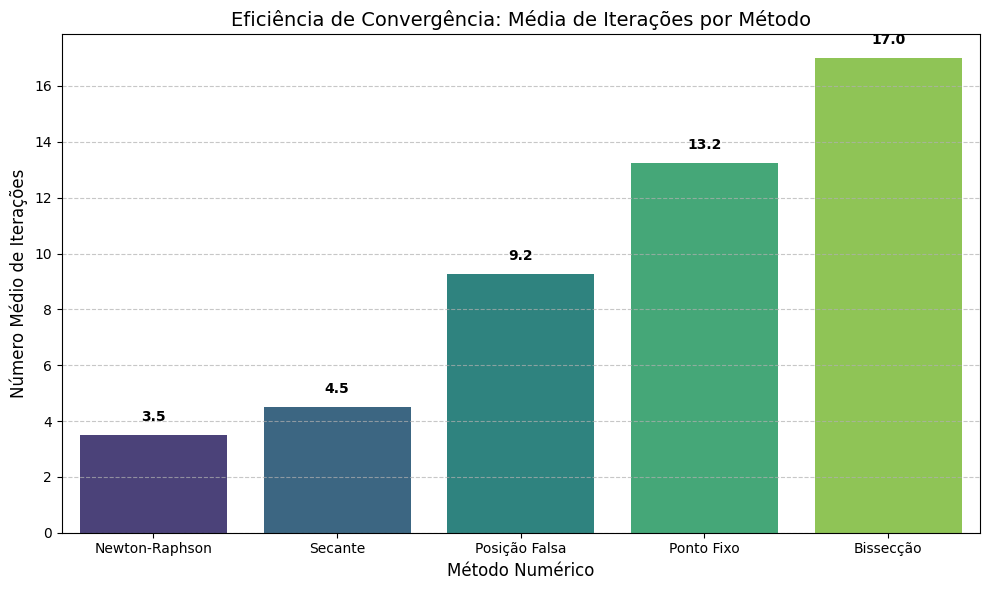

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados para o gráfico (Iterações por Método)
# Pegando a média de iterações de cada método (excluindo falhas)
medias_iter = df_final[df_final["Iterações"] != "-"]["Iterações"].astype(int).groupby(df_final["Método"]).mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=medias_iter.index, y=medias_iter.values, palette="viridis")

plt.title("Eficiência de Convergência: Média de Iterações por Método", fontsize=14)
plt.ylabel("Número Médio de Iterações", fontsize=12)
plt.xlabel("Método Numérico", fontsize=12)

# Adicionando os valores em cima das barras
for i, v in enumerate(medias_iter.values):
    plt.text(i, v + 0.5, str(round(v, 1)), ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()